In [24]:
%load_ext autoreload
%aimport data_creater
%autoreload 1

from data_creater import *
import re

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
stocks = companies()
stocks

,Company,Symbol,Industry
0,3M,MMM,Conglomerate
1,American Express,AXP,Consumer finance
2,Apple,AAPL,Consumer electronics
3,Boeing,BA,Aerospace and defense
4,Caterpillar,CAT,Construction and mining equipment
5,Chevron,CVX,Oil & gas
6,Cisco Systems,CSCO,Computer networking
7,Coca-Cola,KO,Beverages
8,ExxonMobil,XOM,Oil & gas
9,Walgreens Boots Alliance Inc.,WBA,Health Care


In [6]:
symbols = stocks['Symbol'].values.tolist()
print(symbols)

['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'XOM', 'WBA', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WMT', 'DIS', 'GOOG', 'FB']


In [12]:
start_date = '20190101' 
end_date = '20191110'

#download quotes from yahoo and save to directory
for ticker in symbols:
    download = Downloader(ticker,start_date, end_date)
    download.save()

In [22]:
file_path = "./data/{}/quotes.csv"

for ticker in symbols:
    #check if file exist first
    if os.path.isfile(file_path.format(ticker)):
        feature = Feature_Selection.read_csv(ticker, file_path.format(ticker))
        feature.calculate_features()
        feature.normalize_data()
        feature.save_stock_data()
        feature.save_normalized_data()

In [30]:
symbol = 'AAPL'
target_dfs = pd.read_csv('./data/{0}/normalized.csv'.format(symbol),  index_col=[0], parse_dates=[0])
dfs = []
for symbol_tem in symbols:
    if symbol_tem == 'AAPL':
        pass
    df = pd.read_csv('./data/{0}/normalized.csv'.format(symbol_tem), index_col=[0], parse_dates=[0]) 
    df = df.set_index(df['date'])
    df = df.drop(columns = ['date', 'open', 'high', 'low', 'volume', 'close', 'close_delta_1', 'close_delta_2', 'close_delta_3'])
    df.columns = [symbol_tem + '_' + col for col in df.columns]   # if not bool(re.match('.*delta.*', col)) 
    dfs.append(df)

finaldf_ = pd.concat(dfs, axis=1, join='outer')
finaldf_ = finaldf_.reset_index(['date'])
finaldf = target_dfs.merge(finaldf_, on='date', how='left')
finaldf.to_csv('./data/{0}/all_normalized.csv'.format(symbol), index = False)


In [72]:
#.set_index('index')
finaldf.reset_index(inplace=True)
finaldf 

,index,date,open,high,low,volume,close,returns,mfi,normal_open_,...,GOOG_normal_mfi,FB_returns,FB_mfi,FB_normal_open_,FB_normal_high,FB_normal_low,FB_normal_volume,FB_normal_close,FB_normal_returns,FB_normal_mfi
0,0,2019-01-22,156.410004,156.729996,152.619995,30394000,151.484207,-0.022702,62.471911,-0.949115,...,0.353614,-0.016599,69.031480,-0.853045,-0.836387,-0.872896,-0.562203,-0.888596,-0.320275,0.441114
1,1,2019-01-23,154.149994,155.139999,151.699997,23130600,152.096848,0.004036,64.143601,-0.999115,...,0.197374,-0.022408,61.673987,-0.882694,-0.924140,-0.982173,-0.627144,-0.996374,-0.384561,0.213032
2,2,2019-01-24,154.110001,154.479996,151.740005,25441500,150.891296,-0.007958,71.969077,-1.000000,...,0.231859,0.010547,61.662874,-1.000000,-1.000000,-1.000000,-0.602735,-0.945946,-0.019860,0.212687
3,3,2019-01-25,155.479996,158.130005,154.320007,33535500,155.891357,0.032600,70.664551,-0.969690,...,0.180547,0.021572,61.069883,-0.908476,-0.891032,-0.867283,-0.566233,-0.841134,0.102145,0.194304
4,4,2019-01-28,155.789993,156.330002,153.660004,26192100,154.448654,-0.009298,62.946897,-0.962832,...,-0.054408,-0.010389,55.201690,-0.890106,-0.918997,-0.878178,-0.757859,-0.891892,-0.251546,0.012390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,189,2019-10-21,237.520004,240.990005,237.320007,21811800,240.509995,0.017194,65.350606,0.845354,...,-0.028815,0.020820,63.634869,0.366419,0.397300,0.460218,-0.968201,0.501978,0.093827,0.273819
190,190,2019-10-22,241.160004,242.199997,239.619995,20573400,239.960007,-0.002289,73.420131,0.925885,...,0.023929,-0.039887,61.958947,0.461811,0.421086,0.286893,-0.643115,0.257416,-0.577990,0.221865
191,191,2019-10-23,242.100006,243.240005,241.220001,18957200,243.179993,0.013330,80.580307,0.946682,...,0.279615,0.020680,61.203031,0.204318,0.283832,0.303400,-0.849222,0.382993,0.092272,0.198432
192,192,2019-10-24,244.509995,244.800003,241.809998,17318800,243.580002,0.001644,79.677086,1.000000,...,0.273424,0.001235,61.516435,0.288430,0.295082,0.329812,-0.874480,0.390574,-0.122914,0.208148


In [ ]:
dfs = [pd.read_csv(f, index_col=[0], parse_dates=[0]) for f in [] if f.endswith('csv')]

finaldf = pd.concat(dfs, axis=1, join='inner').sort_index()

In [12]:
import sys
!{sys.executable} -m pip install AlgoTraderLib

/Users/bacon_huang/opt/anaconda3/bin/python: No module named pip3


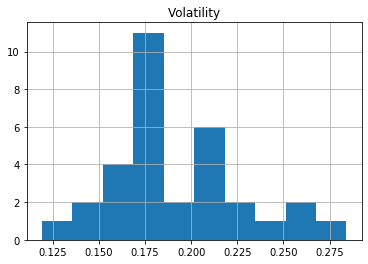

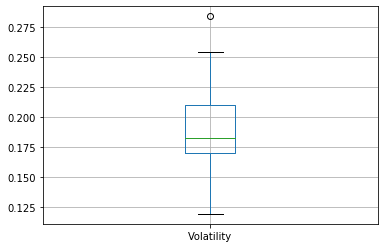

,Volatility
count,32.000000
mean,0.191962
std,0.035089
min,0.119175
25%,0.170242
50%,0.182394
75%,0.210312
max,0.284139


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

vols = [Volatility(ticker).annual for ticker in symbols]
dataset = pd.DataFrame({'Symbol':symbols,'Volatility':vols})

#volatility distribution
dataset.hist()
plt.show()
plt.savefig("./images/volatility_distribution.png")

#box plot to show range
dataset.boxplot()
plt.show()

#volatility statistics
dataset.describe()